<a href="https://colab.research.google.com/github/rafalsza/moje/blob/master/model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL **PREDICTION**

In [ ]:
!pip install yfinance
!pip install prophet

In [4]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet
import pandas as pd
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
symbol = 'btc-usd'
df = yf.download(symbol, start='2011-01-01')
print(df.head())
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'Adj Close']]

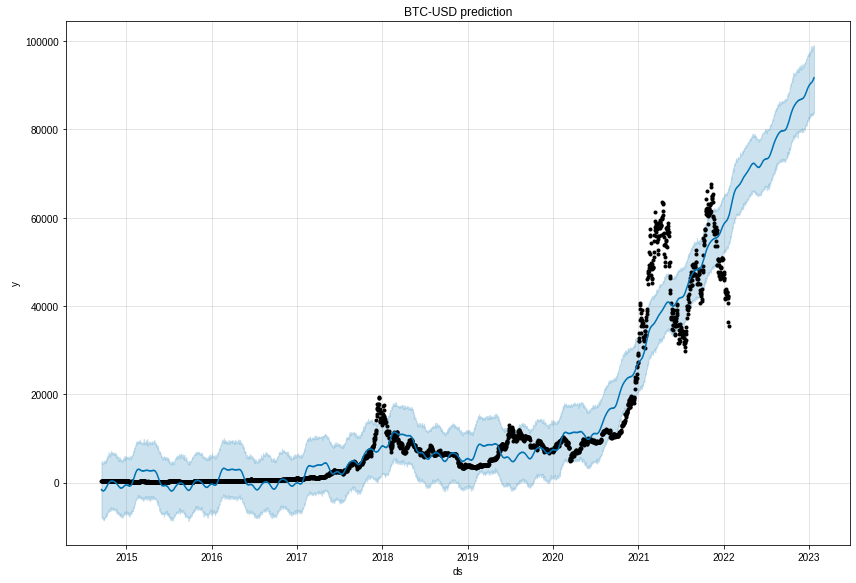

In [6]:
model = Prophet(daily_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(365)
forecast = model.predict(future)
model.plot(forecast,figsize=(12,8))
plt.title(f'{symbol.upper()} prediction')
plt.style.use('seaborn-dark')

In [7]:
fig = plot_plotly(model, forecast, xlabel='date', ylabel='price')
fig.update_layout(template='ggplot2',title_text=f'{symbol.upper()} prediction')
fig.show()

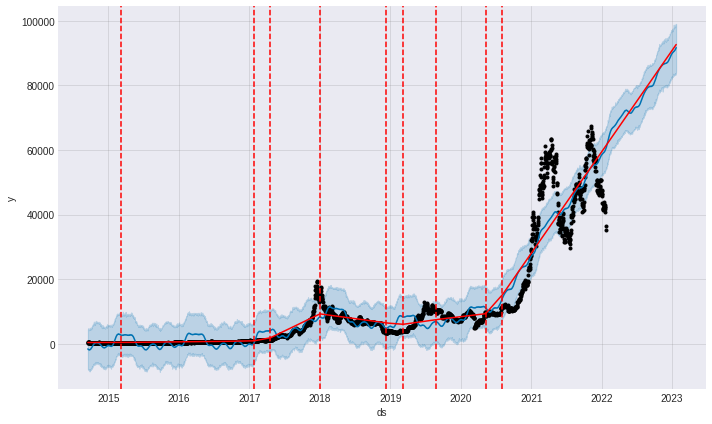

In [8]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)